# Geovisualización de la actividad económica en México

**Autor:** Victor Hugo Hernández García

Proyecto para el curso de Programación de la Maestría en Análisis Estadístico y Computación

## Introducción y objetivos

## Geovisualización en Python

En esta sección se desarrollan algunos ejercicios y experimentos orientados a crear familiaridad con las librerías para la visualización de información georreferenciada usando el lenguaje Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import contextily
import seaborn

Cargaremos un subconjunto de los datos del DENUE como ejemplo. Se trata de los datos del sector *Corporativos*.

En este caso, nuestros datos están en un archivo con extensión ".shp". No sé si todos los datos están ahí, o geopandas automáticamente extrae valores del resto de los archivos.

In [3]:
datos = geopandas.read_file("DatosEjemplo/denue_00_55_shp/conjunto_de_datos/denue_inegi_55_.shp")
datos.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,6309985,09016551111000141000000000U7,CMR,CMR SAB DE CV,551111,Corporativos,0 a 5 personas,CALLE,HAVRE,AVENIDA,...,0803,008,None,None,WWW.CMR.COM.MX,Fijo,19.427819,-99.161780,2010-07,POINT (-99.16178 19.42782)
1,8656186,09010551112000211000000000U9,ORIZABA ENERGIA,ORIZABA ENERGIA S DE RL DE CV,551112,Tenedoras de acciones,0 a 5 personas,None,VASCO DE QUIROGA,CALLE,...,1542,045,None,None,None,Fijo,19.369049,-99.262028,2019-11,POINT (-99.26203 19.36905)
2,9299523,09014551111000311000000000U1,GENTERA,GENTERA SOCIEDAD ANONIMA BURSATIL DE CAPITAL V...,551111,Corporativos,0 a 5 personas,AVENIDA,INSURGENTES SUR,CALLE,...,0717,010,5552767250,None,WWW.GENTERA.COM.MX,Fijo,19.368619,-99.180435,2020-11,POINT (-99.18043 19.36862)
3,6317377,09015551112000115001000000U1,HERMES PROYECTOS Y CONSTRUCCIONES SA DE CV,HERMES PROYECTOS Y CONSTRUCCIONES SA DE CV,551112,Tenedoras de acciones,0 a 5 personas,AVENIDA,PASEO DE LA REFORMA,CALLE,...,0930,004,None,None,None,Fijo,19.426259,-99.170137,2011-03,POINT (-99.17014 19.42626)
4,9329459,09016551111001172000000000U1,TC DESARROLLO ENERGETICO,TC DESARROLLO ENERGETICO S DE RL DE CV,551111,Corporativos,6 a 10 personas,BOULEVARD,MIGUEL DE CERVANTES SAAVEDRA,CALLE,...,0444,004,None,eduardo_aldana@transcanada.com,www.tcenergia.com,Fijo,19.440190,-99.201886,2020-11,POINT (-99.20189 19.44019)


El gráfico más básico se obtiene aplicando el método plot() al dataframe. Aquí podemos ver que muestra todos los puntos en las coordenadas correctas.

<AxesSubplot:>

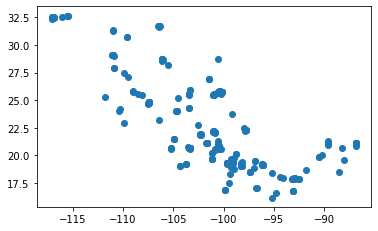

In [4]:
datos.plot()

Esta función puede llamarse así porque mi variable `datos` es un objeto especial de geopandas, porque usé esa función para cargar el archivo shp. 

Siguiendo el tutorial sobre el [Kernel Density Estimation](https://towardsdatascience.com/from-kernel-density-estimation-to-spatial-analysis-in-python-64ddcdb6bc9b), se hace el mapa con el siguiente código:

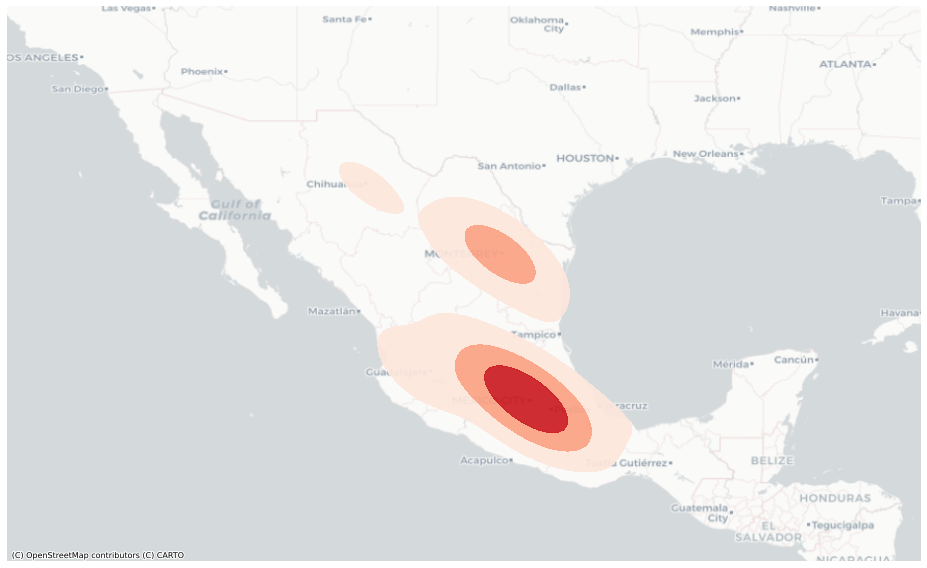

In [8]:
levels = [0.25,0.5,0.75,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    levels = levels,
    shade = True,
    cmap = "Reds",
    alpha = 0.9
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

Hacer esta estimación toma poco menos de 5 segundos la primera vez que se ejecuta el código, y apenas 1.5 segundos en las siguientes ejecuciones. Parece que lo que toma tiempo es la descarga del mapa de fondo desde internet.

A continuación, se harán experimentos para probar qué hacen algunas de estas funciones.

### Niveles del KDE

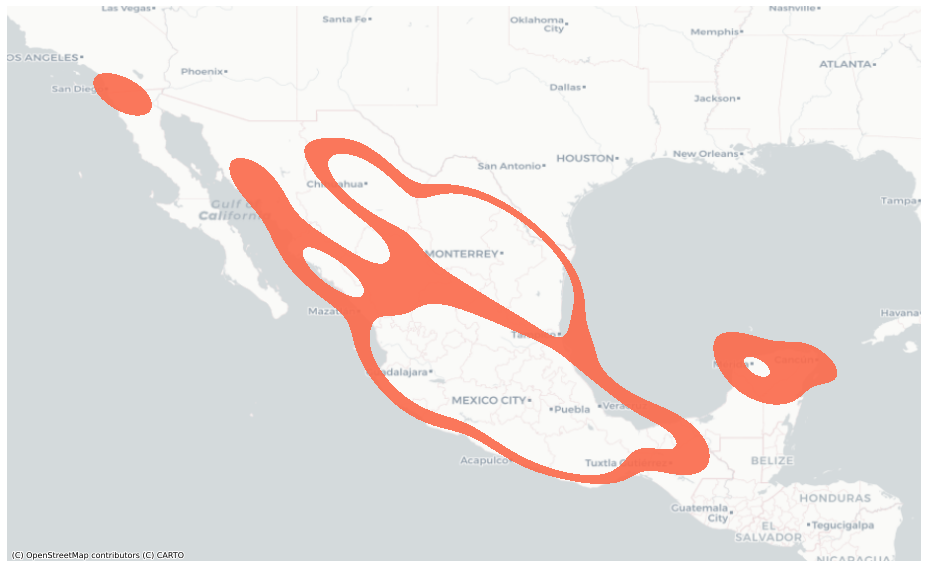

In [14]:
levels = [0.1,0.2]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    levels = levels,
    shade = True,
    cmap = "Reds",
    alpha = 0.9
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

La lista de niveles parece generar parejas de valores y dibuja las *rodajas* del KDE correspondientes. Parece que agrupa los valores de nivel en parejas, de forma que cada nivel no se encima en los anteriores, sino que un nivel comienza donde termina el anterior.

El valor de cero indica zonas con el valor mínimo en la función de distribución, mientras que el 1 indica zonas con la más alta concentración. De acuerdo con la documentación de seaborn, los valores deben estar entre cero y uno. Cada valor en este vector corresponde con una curva de nivel, de modo que el 0.5 es el contorno debajo del cual se encuentra el 50% de los datos. El ejemplo siguiente ayuda a aclarar este punto.

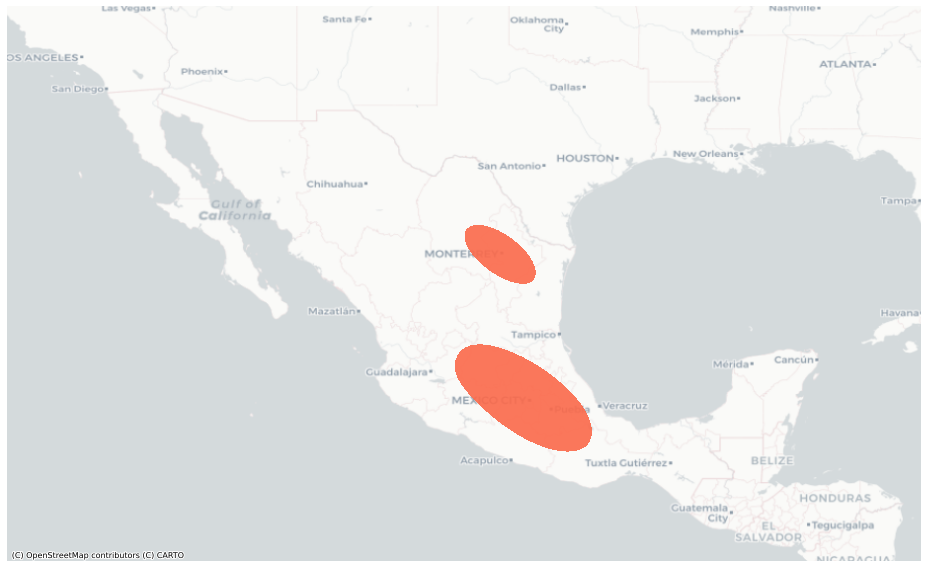

In [21]:
levels = [0.5,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    levels = levels,
    shade = True,
    cmap = "Reds",
    alpha = 0.9
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

Con la lista de niveles [0.5, 1], estamos visualizando el 50% de los datos en el area no iluminada, y el otro 50% en el area iluminada. En el ejemplo siguiente, tenemos el espacio en tres particiones, con cada partición abarcando el 33.3% de los datos.

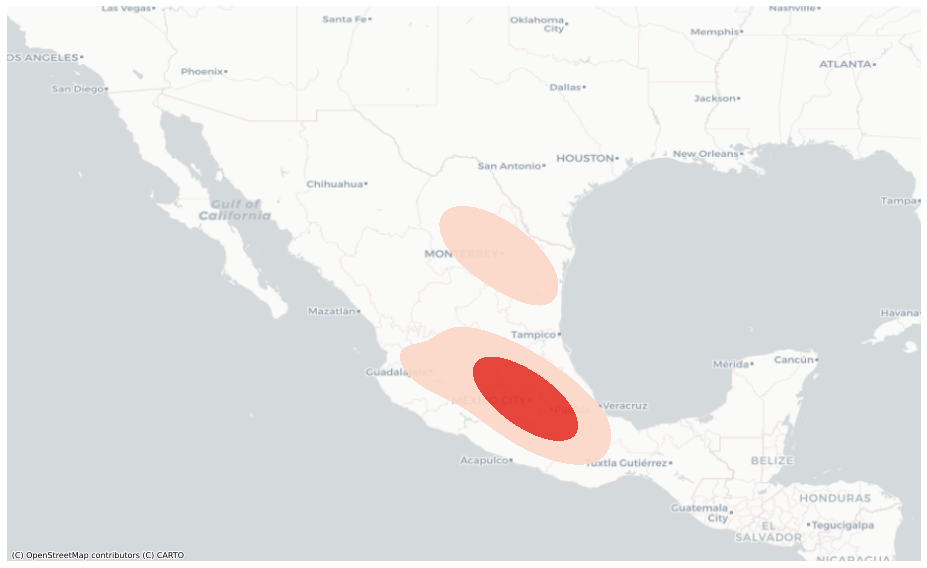

In [22]:
levels = [0.333,0.666,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    levels = levels,
    shade = True,
    cmap = "Reds",
    alpha = 0.9
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

Una forma distinta de visualizar esta información es no rellenar los niveles, sino mostrar sólo las curvas de nivel

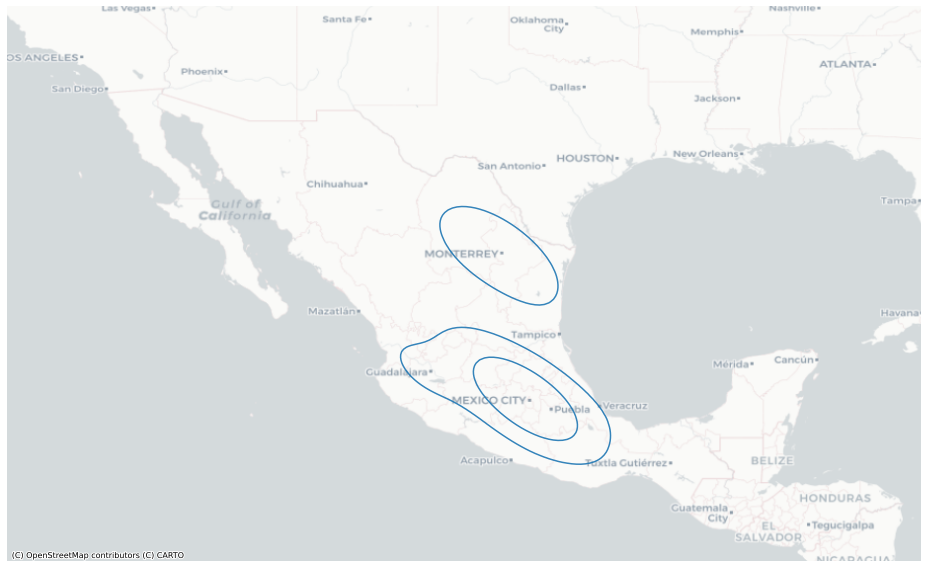

In [27]:
levels = [0.333,0.666,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    levels = levels,
    #shade = True,
    #cmap = "Reds",
    alpha = 0.9
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

En este ejemplo, fue necesario cambiar la paleta de colores, de lo contrario, una de las curvas se vuelve casi blanca.

Otra forma de visualizar se obtiene de no especificar los niveles:

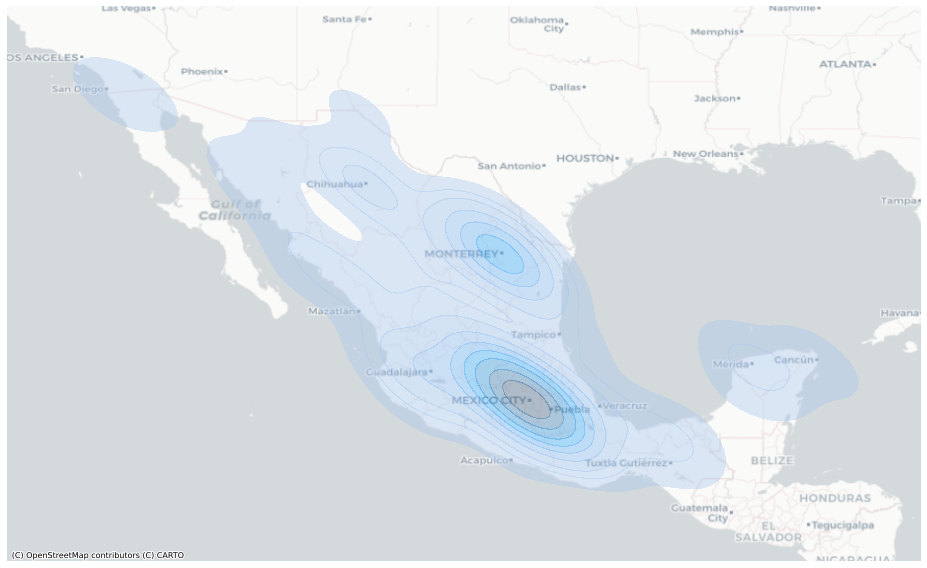

In [35]:
levels = [0.333,0.666,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    #levels = levels,
    fill = True,
    #cmap = "Reds",
    alpha = 0.4
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

En este ejemplo, se mantuvo la paleta de colores más obscuros para mantener el contraste, y se redujo el alpha, para crear transparencia y que el mapa subyacente no se pierda.

Por último, revisamos cómo se ve este mapa comparado con los puntos.

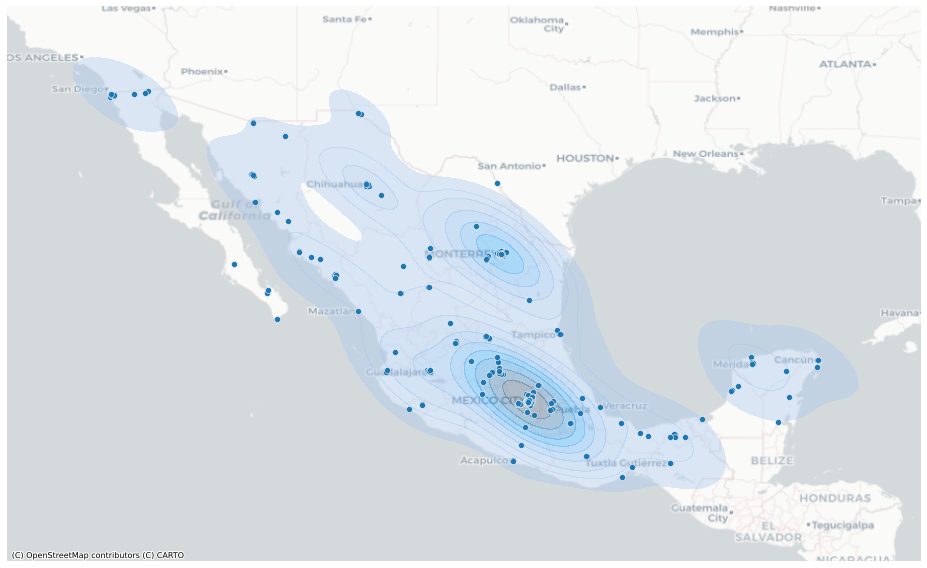

In [36]:
levels = [0.333,0.666,1]

f, ax = plt.subplots(ncols=1, figsize=(20,8))

kde = seaborn.kdeplot(
    ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y,
    #levels = levels,
    fill = True,
    #cmap = "Reds",
    alpha = 0.4
)
seaborn.scatterplot(ax = ax,
    x = datos["geometry"].x,
    y = datos["geometry"].y
)

contextily.add_basemap(ax = ax, crs = datos.crs.to_string(), source = contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()

Podemos ver que hay zonas en Baja California Sur donde hay puntos, pero el KDE no los capturó. También observamos que las zonas con más altas densidades muestran una forma ovalada en el KDE, aunque los puntos no necesariamente se distribuyen de esa forma. Alrededor de la CDMX puede que sí, por los puntos al noroeste, pero alrededor de Monterrey no parece haber puntos suficientes para justificar la forma. Quizás haya muchos puntos en Saltillo y eso jale la distribución, pero intuitivamente creo que el ovalo debería estar orientado en otra dirección.

 Esto puede deberse a la familia del kernel, o al ancho de banda, los cuales son hiperparámetros que pueden ajustarse con otros métodos. La revisión de estos métodos se deja para secciones más adelante.

### Opciones de estilo para el basemap

### Gráficas de areas más pequeñas

## Filtrado de datos y ponderadores

### Filtro de regiones

### Filtro de actividades

Cómo mantener el mapa centrado aunque los datos no cubran toda el área? Por ejemplo, si quiero el mapa de todo el país, pero sólo aparecen datos en CDMX, se graficará sólo CDMX? para un usuario puede ser confuso y llevarloa  apensar que se trata de un error.

### Ponderadores

Hay una opción `weights` en kdeplot

### Hiperparámetros

Usar el paquete de aprendizaje de máquina para encontrar los parámetros óptimos del KDE

## Preguntas

1. Si voy a cargar los datos desde una base de datos SQL, ¿necesito geopandas? Al parecer sólo se requiere para cargar el archivo .shp
2. ¿Me conviene usar Jupyter para este proyecto? Sé que puedo llamar código de python y sql desde un Rmd, pero no sé si jupyter tiene las mismas facilidades.